In [7]:
import functions
from functions import *
import matplotlib.pyplot as plt

# Dimensions from 1 to 3 (higher possible)
D = 1
# Number of lattice points  100
N = 100
L_over_r = 3

epsilon = L_over_r/N
mu = 10
epsilon_2 = epsilon**2
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon_2 = epsilon_2

# Initialize plane wave with according dimensions
psi =  generate_gauss(np.array((20,)), np.array((20,)), 100)

df = time_evolution(psi, integrator_euler, 0.01, 0.1)
df.head()


/Users/gyulaiemese/Desktop/Daniel/comp_phys/functions.py:333: ComplexWarning: Casting complex values to real discards the imaginary part
  gaussian[index] =     entry


,norm,exp_Etot,exp_Ekin,exp_Epot,exp_pos,indet_pos,time,function
0,1.873239e-87,2.009687e-87,1.038596e-87,9.710908e-88,[[1.3112669945853938e-85]],[[9.225696796997978e-84]],0.00,[(6.409110291908249e-66+1.511952893969146e-48j...
0,1.873579e-87,2.010565e-87,1.039334e-87,9.712318e-88,[[1.311514680426246e-85]],[[9.22755568384153e-84]],0.01,[(1.9295981272220955e-48+3.023905787938292e-48...
0,1.873918e-87,2.011453e-87,1.040121e-87,9.713316e-88,[[1.3117732777187731e-85]],[[9.229610880206778e-84]],0.02,[(5.788794381666287e-48+9.474409929084406e-49j...
0,1.874259e-87,2.012382e-87,1.040991e-87,9.713905e-88,[[1.312042881384631e-85]],[[9.2318634280053e-84]],0.03,[(4.622940125112104e-48-8.305859180119404e-48j...
0,1.874600e-87,2.013531e-87,1.042121e-87,9.714100e-88,[[1.312323873785737e-85]],[[9.23431717717111e-84]],0.04,[(-1.547726191888139e-47-1.4389700163025217e-4...


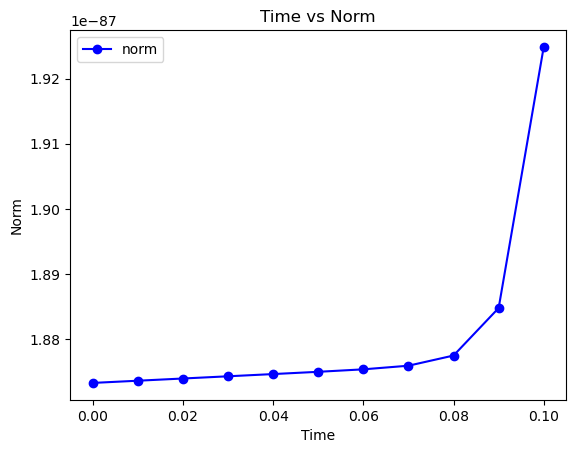

In [8]:
df.plot(x='time', y='norm', kind='line', marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Norm')
plt.title('Time vs Norm')

# Display the plot
plt.show()

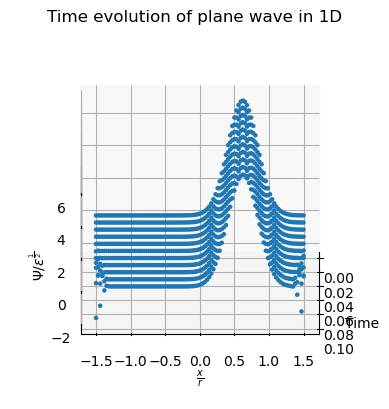

In [10]:
from mpl_toolkits.mplot3d import Axes3D
length = len(df)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon


# Scatter plot
ax.view_init(elev=20, azim=0)
ax.set_proj_type('ortho')
for index, row in df.iterrows():
    time = row['time']
    function = row['function']
    ax.scatter(time, x_axis, function.real/epsilon**(0.5), marker = '.',color = 'C0', alpha = 1)

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel(r"$\frac{x}{r}$")
ax.set_zlabel(r"$\Psi/ \varepsilon^{\frac{1}{2}}$")
ax.set_title('Time evolution of plane wave in 1D')

# Display the plot
plt.show()
